In [1]:
import wfdb
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wfdb import processing
import pandas as pd

{'record_name': '4991', 'n_sig': 12, 'fs': 400, 'counter_freq': None, 'base_counter': None, 'sig_len': 2934, 'base_time': None, 'base_date': None, 'comments': ['Age: 85', 'Sex: Female', 'Chagas label: True', 'Source: SaMi-Trop'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'p_signal': array([[-0.068, -0.098, -0.029, ..., -0.293, -0.205, -0.127],
       [-0.086, -0.127, -0.041, ..., -0.326, -0.234, -0.13 ],
       [-0.097, -0.129, -0.032, ..., -0.31 , -0.22 , -0.106],
       ...,
       [-0.055, -0.107, -0.051, ..., -0.31 , -0.224, -0.12 ],
       [-0.039, -0.078, -0.039, ..., -0.293, -0.215, -0.127],
       [-0.008, -0.015, -0.007, ..., -0.064, -0.047, -0.03 ]],
      shape=(2934, 12)), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['4991.dat', '4991.dat', '4991.dat', '4991.dat', '4991.dat', '4991.dat', '4991.dat', '4991.dat', '4991.dat', '4991.dat', '4991.dat', '4991.dat'], 'fmt': ['16', '16', '16', '16', '16', '16'

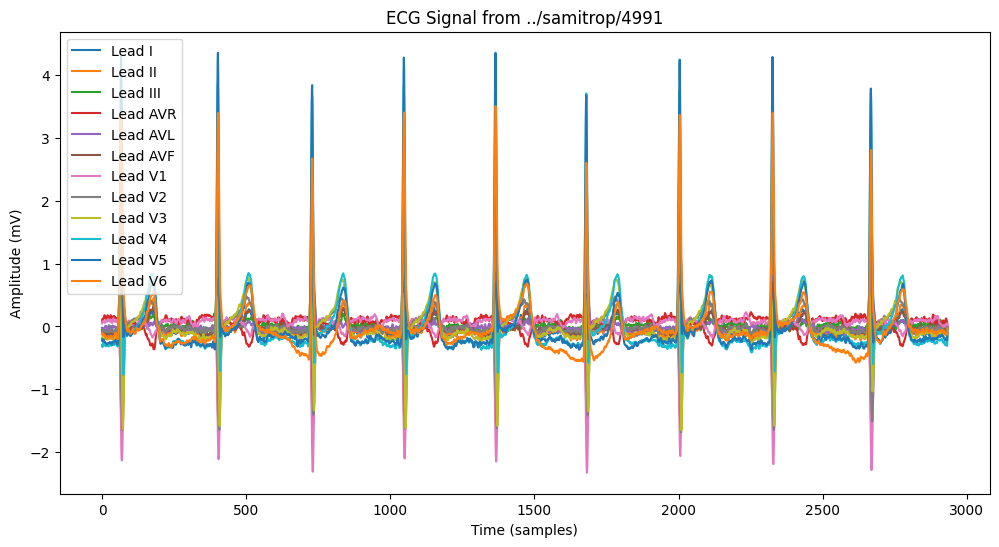

In [2]:
# Path to a sample WFDB record (change this to one of your extracted files)
record_name = "../samitrop/4991"  # Example, replace with an actual record name

# Load the WFDB record
record = wfdb.rdrecord(record_name)

# Display metadata
print(record.__dict__)

# Extract signals and plot them
plt.figure(figsize=(12, 6))
for i in range(record.p_signal.shape[1]):  # Loop through each lead (ECG channel)
    plt.plot(record.p_signal[:, i], label=f"Lead {record.sig_name[i]}")

plt.title(f"ECG Signal from {record_name}")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.show()


In [6]:
print("Record Name:", record.record_name)
print("Sampling Frequency:", record.fs)
print("Number of Leads:", len(record.sig_name))
print("Lead Names:", record.sig_name)
print("Gain Factors:", record.adc_gain)
print("Baseline Offsets:", record.baseline)
print("Units:", record.units)
# Check total number of samples divided by sampling frequency
total_samples = record.p_signal.shape[0]
total_time = total_samples / record.fs
print("Total Samples:", total_samples)
print("Total Time (seconds):", total_time)



# Print all the key value of the record one by one
# for key, value in record.__dict__.items():
#     print(key, ":", value)
    


Record Name: 4991
Sampling Frequency: 400
Number of Leads: 12
Lead Names: ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
Gain Factors: [1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0]
Baseline Offsets: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Units: ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV']
Total Samples: 2934
Total Time (seconds): 7.335


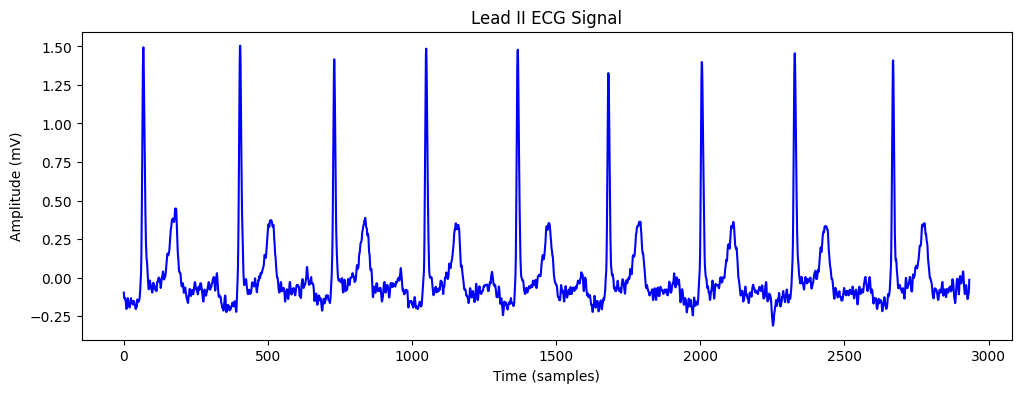

In [7]:
lead_index = 1  # Change to any lead index you want to visualize
plt.figure(figsize=(12, 4))
plt.plot(record.p_signal[:, lead_index], color="blue")
plt.title(f"Lead {record.sig_name[lead_index]} ECG Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (mV)")
plt.show()


In [8]:
# Convert signals into a DataFrame
df = pd.DataFrame(record.p_signal, columns=record.sig_name)

# Summary statistics
print(df.describe())

# Check for missing values
print("Missing Values:", df.isnull().sum())


                 I           II          III          AVR          AVL  \
count  2934.000000  2934.000000  2934.000000  2934.000000  2934.000000   
mean      0.005343     0.005321    -0.000011    -0.000535     0.005025   
std       0.253652     0.243523     0.065321     0.246524     0.139530   
min      -0.205000    -0.313000    -0.336000    -1.576000    -0.156000   
25%      -0.110000    -0.111000    -0.029000     0.000000    -0.055750   
50%      -0.069000    -0.063000     0.002000     0.071500    -0.026000   
75%       0.003000     0.007000     0.034000     0.117000     0.010000   
max       1.746000     1.505000     0.205000     0.227000     1.042000   

               AVF           V1           V2           V3           V4  \
count  2934.000000  2934.000000  2934.000000  2934.000000  2934.000000   
mean      0.005103    -0.002705     0.001579     0.001321     0.002472   
std       0.125347     0.339229     0.280487     0.319282     0.572886   
min      -0.255000    -2.325000    -1

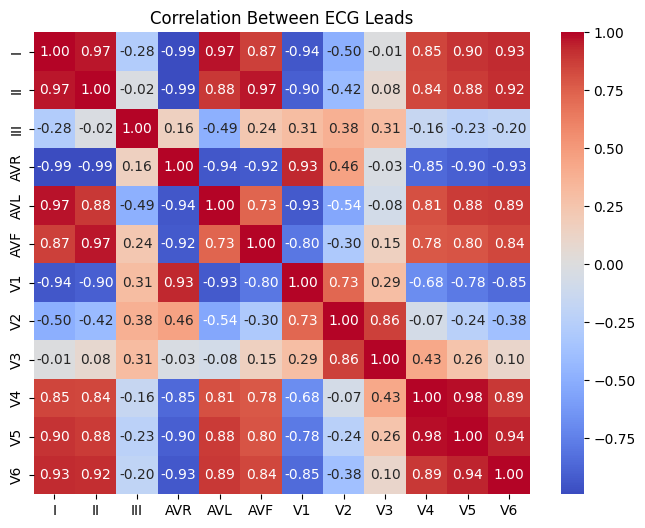

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between ECG Leads")
plt.show()

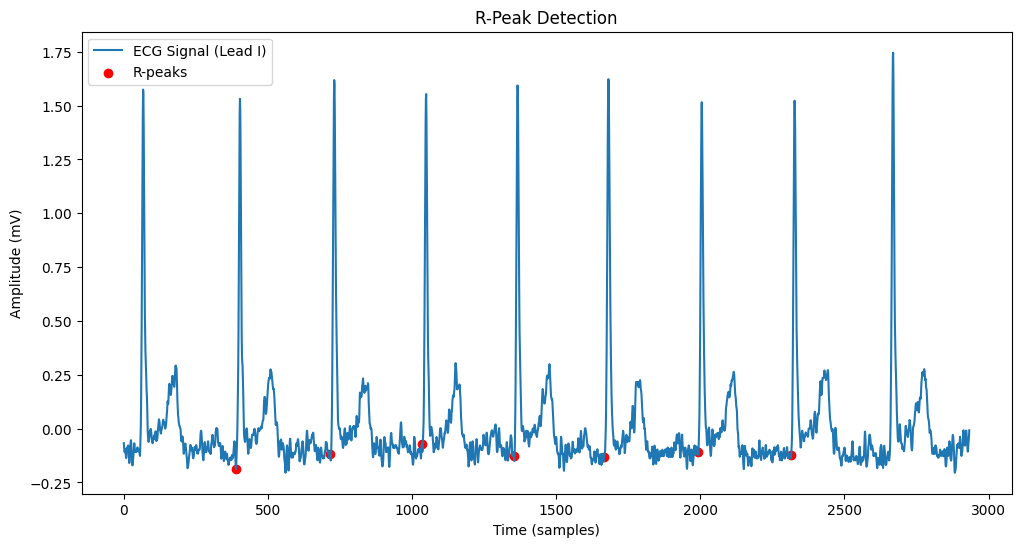

Estimated Heart Rate (BPM): 74.86


In [10]:
# Detect peaks in Lead I (change the index if needed)
r_peaks = processing.gqrs_detect(record.p_signal[:, 0], fs=record.fs)

# Plot ECG with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(record.p_signal[:, 0], label="ECG Signal (Lead I)")
plt.scatter(r_peaks, record.p_signal[r_peaks, 0], color="red", marker="o", label="R-peaks")
plt.title("R-Peak Detection")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.show()

# Calculate heart rate from R-peaks
rr_intervals = np.diff(r_peaks) / record.fs  # Convert to seconds
heart_rate = 60 / rr_intervals  # Convert to BPM

print(f"Estimated Heart Rate (BPM): {np.mean(heart_rate):.2f}")


# CSV File Data

In [13]:
# Load both CSV files (Replace with your actual filenames)
df1 = pd.read_csv("../samitrop-base/exams.csv")  # First CSV (original dataset with ECG & patient info)
df2 = pd.read_csv("../samitrop-base/samitrop_chagas_labels.csv")  # Second CSV (exam_id, patient_id, chagas info)

# Merge both datasets on 'exam_id'
df = pd.merge(df1, df2, on="exam_id", how="inner")  # Change to "left" if needed

# Ensure only one 'patient_id' column remains
if 'patient_id_x' in df.columns and 'patient_id_y' in df.columns:
    # Check if both patient_id columns match
    if (df['patient_id_x'] == df['patient_id_y']).all():
        df = df.drop(columns=['patient_id_y'])  # Drop the duplicate column
        df = df.rename(columns={'patient_id_x': 'patient_id'})  # Rename properly
    else:
        print("⚠️ Warning: Patient IDs do not match for all rows!")

# Save the cleaned, merged dataset
df.to_csv("merged-samitrop.csv", index=False)

# Display first few rows
print("✅ Merged Data Preview:")
print(df.head())

✅ Merged Data Preview:
   exam_id  age  is_male  normal_ecg  death     timey  nn_predicted_age  \
0   247007   67    False       False  False  2.378450         61.212074   
1   181629   34    False       False  False  2.676793         56.736490   
2   406936   75    False       False  False  2.080108         83.031970   
3   253803   53    False        True  False  2.071821         58.985962   
4   253214   69     True       False  False  2.055246         71.593796   

   chagas  
0    True  
1    True  
2    True  
3    True  
4    True  


In [29]:
# Load CSV file (Change 'your_file.csv' to your actual
df = pd.read_csv("merged-samitrop.csv")

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check dataset info
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   exam_id  age  is_male  normal_ecg  death     timey  nn_predicted_age  \
0   247007   67    False       False  False  2.378450         61.212074   
1   181629   34    False       False  False  2.676793         56.736490   
2   406936   75    False       False  False  2.080108         83.031970   
3   253803   53    False        True  False  2.071821         58.985962   
4   253214   69     True       False  False  2.055246         71.593796   

   chagas  
0    True  
1    True  
2    True  
3    True  
4    True  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   exam_id           815 non-null    int64  
 1   age               815 non-null    int64  
 2   is_male           815 non-null    bool   
 3   normal_ecg        815 non-null    bool   
 4   death             815 non-null    b

In [30]:
# For all columns, check for missing values
for col in df.columns:
    print(f"Missing values in {col}: {df[col].isnull().sum()}")

Missing values in exam_id: 0
Missing values in age: 0
Missing values in is_male: 0
Missing values in normal_ecg: 0
Missing values in death: 0
Missing values in timey: 0
Missing values in nn_predicted_age: 0
Missing values in chagas: 0


In [18]:
# Check all columns names
print(df.columns)

Index(['exam_id', 'age', 'is_male', 'normal_ecg', 'death', 'timey',
       'nn_predicted_age', 'chagas'],
      dtype='object')


In [31]:
# Count unique values in categorical columns
# categorical_columns = ['is_male', 'death', 'normal_ecg', '1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF','chagas']


categorical_columns = [ 'is_male', 'normal_ecg', 'death',  'chagas']


for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

# total number of unique patients
print("\nTotal number of unique patients:")
print(len(df['exam_id'].unique()))


Unique values in is_male:
is_male
False    548
True     267
Name: count, dtype: int64

Unique values in normal_ecg:
normal_ecg
False    666
True     149
Name: count, dtype: int64

Unique values in death:
death
False    770
True      45
Name: count, dtype: int64

Unique values in chagas:
chagas
True    815
Name: count, dtype: int64

Total number of unique patients:
815


In [22]:
# Convert Boolean values from string to actual Boolean type (if necessary)
df[categorical_columns] = df[categorical_columns].applymap(lambda x: True if str(x).upper() == "TRUE" else False)

# Convert age and timey to numeric (if necessary)
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['nn_predicted_age'] = pd.to_numeric(df['nn_predicted_age'], errors='coerce')
df['timey'] = pd.to_numeric(df['timey'], errors='coerce')

C:\Users\ssami\AppData\Local\Temp\ipykernel_7540\1153683344.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[categorical_columns] = df[categorical_columns].applymap(lambda x: True if str(x).upper() == "TRUE" else False)


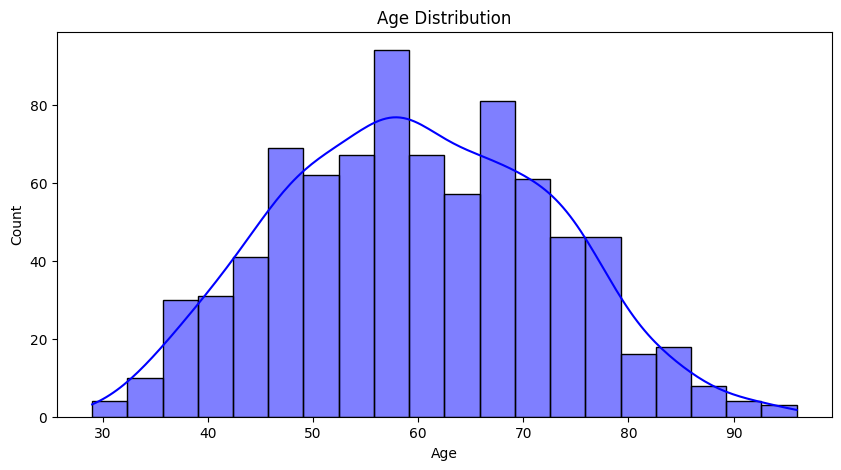

In [23]:
# 1. Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

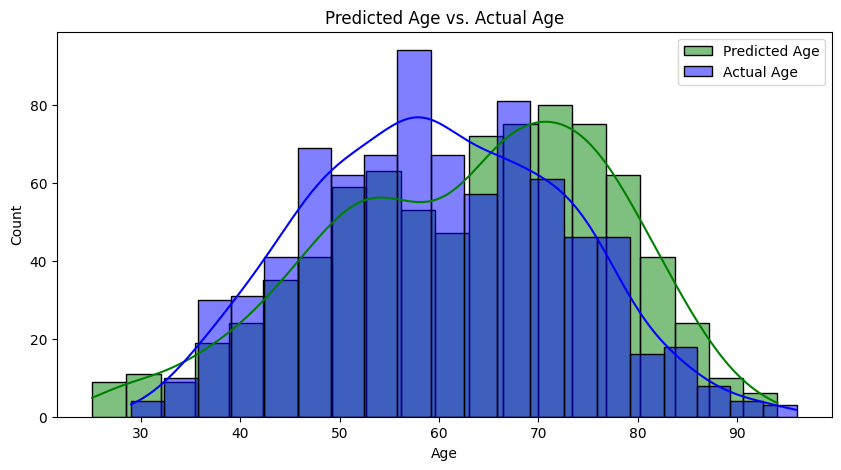

In [24]:

# 2. Distribution of nn_predicted_age vs. Actual Age
plt.figure(figsize=(10, 5))
sns.histplot(df['nn_predicted_age'], bins=20, kde=True, color='green', label="Predicted Age")
sns.histplot(df['age'], bins=20, kde=True, color='blue', alpha=0.5, label="Actual Age")
plt.title("Predicted Age vs. Actual Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

C:\Users\ssami\AppData\Local\Temp\ipykernel_21296\1223145827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['death'], palette="pastel")


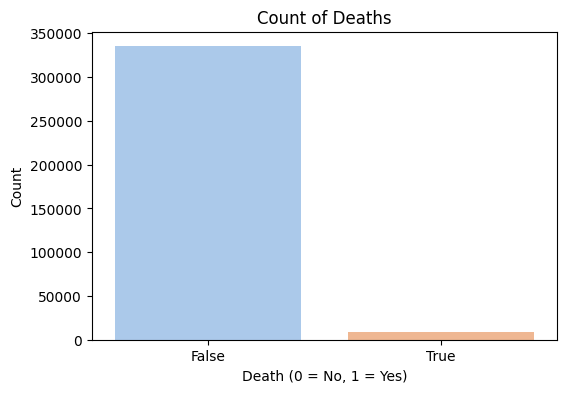

In [13]:
# 4. Count of Deaths
plt.figure(figsize=(6, 4))
sns.countplot(x=df['death'], palette="pastel")
plt.title("Count of Deaths")
plt.xlabel("Death (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

C:\Users\ssami\AppData\Local\Temp\ipykernel_7540\2824739598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['normal_ecg'], palette="pastel")


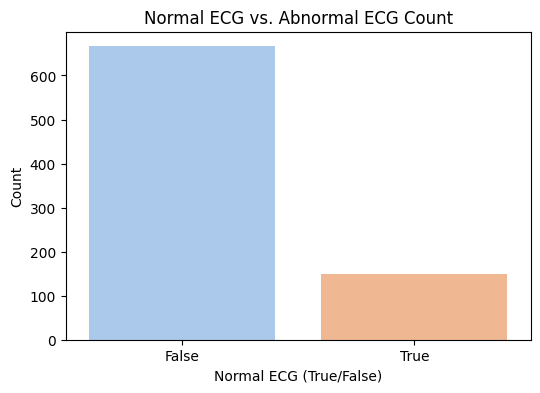

In [25]:
# 5. Normal ECG vs. Abnormal ECG Count
plt.figure(figsize=(6, 4))
sns.countplot(x=df['normal_ecg'], palette="pastel")
plt.title("Normal ECG vs. Abnormal ECG Count")
plt.xlabel("Normal ECG (True/False)")
plt.ylabel("Count")
plt.show()

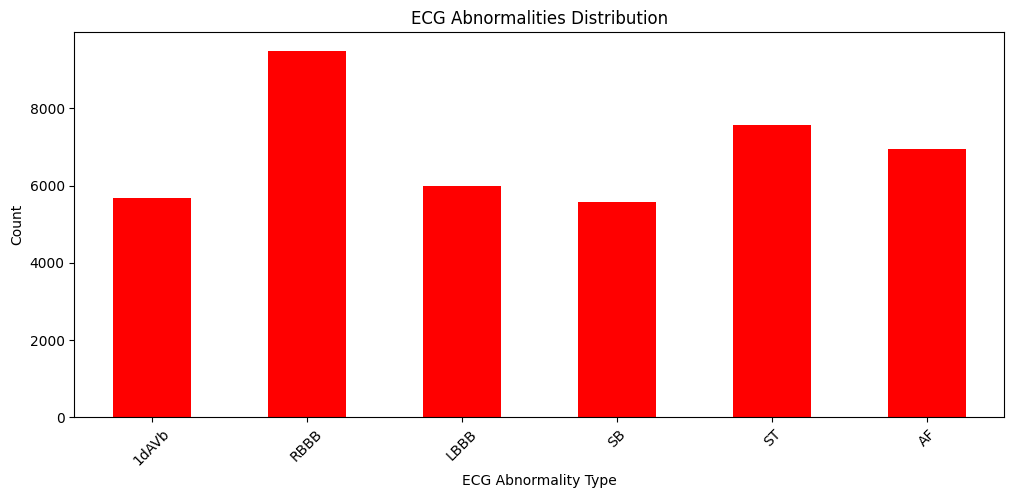

In [15]:
# 6. Distribution of ECG Abnormalities
plt.figure(figsize=(12, 5))
df[['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF']].sum().plot(kind='bar', color='red')
plt.title("ECG Abnormalities Distribution")
plt.ylabel("Count")
plt.xlabel("ECG Abnormality Type")
plt.xticks(rotation=45)
plt.show()

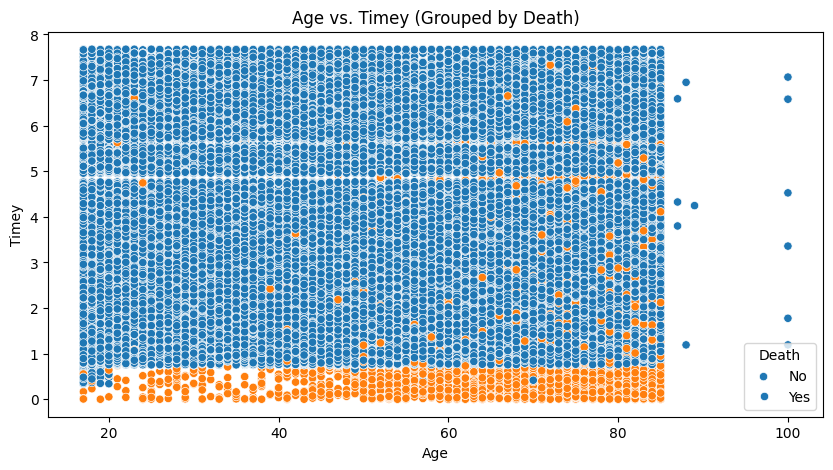

In [16]:
# 7. Age vs. Timey Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['age'], y=df['timey'], hue=df['death'])
plt.title("Age vs. Timey (Grouped by Death)")
plt.xlabel("Age")
plt.ylabel("Timey")
plt.legend(title="Death", labels=["No", "Yes"])
plt.show()

C:\Users\ssami\AppData\Local\Temp\ipykernel_21296\3953383109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['death'], y=df['age'], palette="coolwarm")


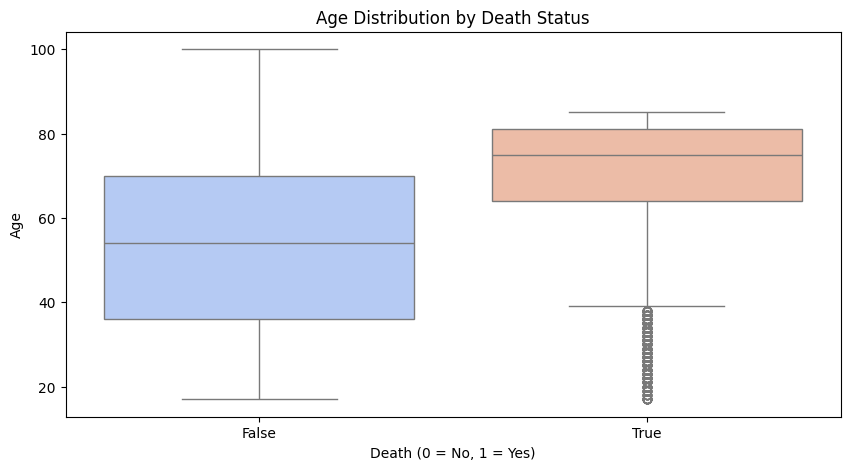

In [17]:
# 8. Comparing Age of Patients Who Died vs. Survived
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['death'], y=df['age'], palette="coolwarm")
plt.title("Age Distribution by Death Status")
plt.xlabel("Death (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

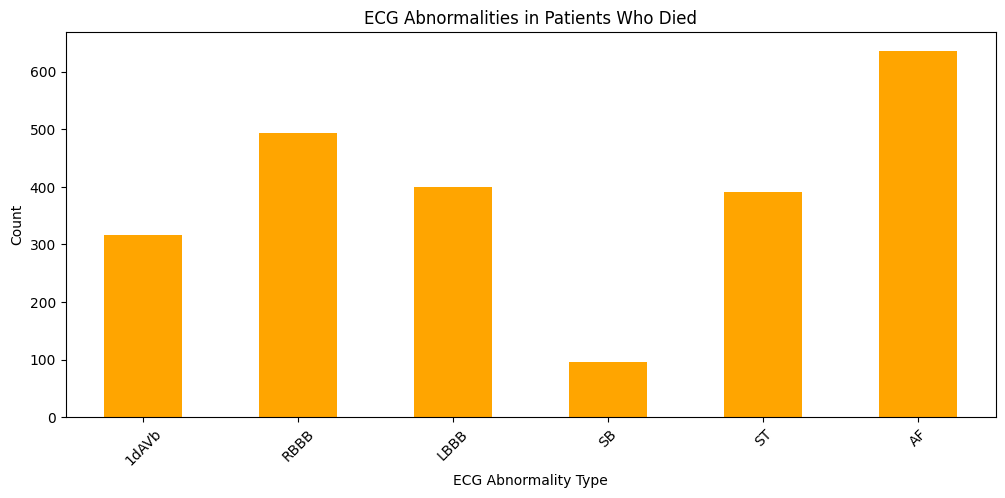

In [18]:
# 9. ECG Abnormalities in Patients Who Died
death_cases = df[df['death'] == True]
plt.figure(figsize=(12, 5))
death_cases[['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF']].sum().plot(kind='bar', color='orange')
plt.title("ECG Abnormalities in Patients Who Died")
plt.ylabel("Count")
plt.xlabel("ECG Abnormality Type")
plt.xticks(rotation=45)
plt.show()

Missing values in exam_id: 0
Missing values in age: 0
Missing values in is_male: 0
Missing values in nn_predicted_age: 0
Missing values in 1dAVb: 0
Missing values in RBBB: 0
Missing values in LBBB: 0
Missing values in SB: 0
Missing values in ST: 0
Missing values in AF: 0
Missing values in patient_id: 0
Missing values in death: 0
Missing values in timey: 109939
Missing values in normal_ecg: 0
Missing values in trace_file: 0
Missing values in chagas: 0


In [1]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>
